# Introduction:
**Understanding the Influence of Age on Investor Behavior**

In this project, I have taken the initiative to delve into investors behavior, with a particular focus on how age influences investment decisions. I have collected 132 distinct responses using questionnaire, seeking to understand what motivates individuals and how their age may impact where they choose to invest. By utilizing data analysis techniques, I aim to uncover patterns in their decisions and explore the relationship between age and investment choices.

*Please note that this research is purely observational and does not provide investment advice.*

In [1]:
## Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
## Read the csv file
df=pd.read_csv('/kaggle/input/investors-behavior-on-investment-avenues/investors.csv')
df

,Timestamp,Username,Which best describes your gender?,Age,What is your occupation?,What is your highest education level?,Do you invest in Investment Avenues?,What proportion of money you invest?,What do you think are the best options for investing your money? (Rank in order of preference) [Mutual Funds],What do you think are the best options for investing your money? (Rank in order of preference) [Equity Market],...,How often do you monitor your investments?,How much return do you expect from any investment instrument?,Which investment avenue do you mostly invest in?,What are your savings objectives?,Reasons for investing in Equity Market,Reasons for investing in Mutual Funds,What is your purpose behind investment?,Reasons for investing in Government Bonds,Reasons for investing in Fixed Deposits,Your major source of information for investment is
0,2023/04/09 9:14:59 PM GMT+5:30,NaN,Male,39,Salaried,Post Graduate,Yes,10% - 20%,3,3,...,Monthly,10% - 20%,Fixed Deposits,Retirement Plan,Power of compounding,Better Returns,Savings for retirement,Safe Investment,Fixed returns,Newspapers and Magazines
1,2023/04/09 9:25:23 PM GMT+5:30,NaN,Male,30,Salaried,Post Graduate,Yes,20% - 30%,3,6,...,Weekly,10% - 20%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Wealth creation,Risk-free returns,Fixed returns,Internet
2,2023/04/09 9:34:18 PM GMT+5:30,NaN,Female,26,Salaried,Professional Degree,No,30% and above,7,4,...,Weekly,10% - 20%,Mutual Funds,Retirement Plan,Liquidity,Better Returns,Wealth creation,Risk-free returns,Fixed returns,Internet
3,2023/04/09 9:36:55 PM GMT+5:30,NaN,Male,32,Salaried,Post Graduate,Yes,10% - 20%,7,5,...,Monthly,10% - 20%,Mutual Funds,Retirement Plan,Capital Appreciation,Funds Diversification,Savings for retirement,Risk-free returns,Risk free,Internet
4,2023/04/09 9:37:42 PM GMT+5:30,NaN,Male,28,Salaried,Professional Degree,Yes,30% and above,4,6,...,Daily,10% - 20%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Wealth creation,Tax Incentives,Fixed returns,Internet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2023/04/12 8:07:57 AM GMT+5:30,NaN,Male,25,Salaried,Post Graduate,Yes,20% - 30%,4,6,...,Monthly,10% - 20%,Fixed Deposits,Retirement Plan,Power of compounding,Tax Benefits,Hedging against inflation,Safe Investment,Fixed returns,Internet
128,2023/04/12 9:36:48 PM GMT+5:30,NaN,Female,42,Self-employed,Others,Yes,30% and above,3,6,...,Monthly,10% - 20%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Wealth creation,Safe Investment,Fixed returns,Financial Consultant
129,2023/04/12 10:52:26 PM GMT+5:30,NaN,Male,30,Salaried,Post Graduate,No,5% - 10%,5,5,...,Daily,10% - 20%,Fixed Deposits,Retirement Plan,Dividend Income,Better Returns,Savings for retirement,Risk-free returns,High Interest Rates,Internet
130,2023/04/13 9:50:52 AM GMT+5:30,NaN,Female,33,Salaried,Post Graduate,Yes,20% - 30%,5,3,...,Monthly,10% - 20%,Mutual Funds,Retirement Plan,Capital Appreciation,Better Returns,Wealth creation,Risk-free returns,Fixed returns,Newspapers and Magazines


**Observations:**

* Column headers require data preprocessing due to their length.
* Need to drop the unnecessary columns to focus on the relevant data.

In [3]:
## Dropping the columns
df.drop(columns=['Timestamp','Username'], axis=1, inplace=True)

**Observations:**

* Columns Timestamp and Username need to be removed from the table

In [4]:
## Renaming the multiple columns
columns_rename_mapping= {
    'Which best describes your gender?':'Gender',
    'What is your occupation?':'Occupation',
    'What is your highest education level?':'Education_level',
    'Do you invest in Investment Avenues?':'Investment_avenues',
    'What proportion of money you invest?':'Proportion_invest',
    "What do you think are the best options for investing your money? (Rank in order of preference) [Mutual Funds]":'Mutual_funds',
    "What do you think are the best options for investing your money? (Rank in order of preference) [Equity Market]":'Equity_market',
    "What do you think are the best options for investing your money? (Rank in order of preference) [Corporate Bonds]":'Corporate_bonds',
    "What do you think are the best options for investing your money? (Rank in order of preference) [Government Bonds]":"G_secs",
    "What do you think are the best options for investing your money? (Rank in order of preference) [Fixed Deposits]":'FD',
    "What do you think are the best options for investing your money? (Rank in order of preference) [PPF - Public Provident Fund]":'PPF',
    "What do you think are the best options for investing your money? (Rank in order of preference) [Gold / Sovereign Gold Bonds - SGB]":'Gold/SGB',
    'Do you invest in Stock market?':'Invest_stocks',
    'What are the factors considered by you while investing in any instrument?':'Factors_investment',
    'What is your investment objective?':'Investment_objective',
    'How long do you prefer to keep your money in any investment instrument?':'Duration',
    'How often do you monitor your investments?':'Investment_monitor',
    'How much return do you expect from any investment instrument?':'Expected_return',
    'Which investment avenue do you mostly invest in?':'Preferred_avenue',
    'What are your savings objectives?':'Savings_objective',
    'Reasons for investing in Equity Market':'Reason_equity',
    'Reasons for investing in Mutual Funds':'Reason_MF',
    'What is your purpose behind investment?':'Purpose_investment',
    'Reasons for investing in Government Bonds':'Reason_Gsec',
    'Reasons for investing in Fixed Deposits':'Reason_FD',
    'Your major source of information for investment is':'Source'
}

df.rename(columns=columns_rename_mapping, inplace=True)

**Observations:**

* Useful step in data preprocessing process, to rename multiple columns use new variable to make codes organised

In [5]:
## Check the head of the data frame
df.head()

,Gender,Age,Occupation,Education_level,Investment_avenues,Proportion_invest,Mutual_funds,Equity_market,Corporate_bonds,G_secs,...,Investment_monitor,Expected_return,Preferred_avenue,Savings_objective,Reason_equity,Reason_MF,Purpose_investment,Reason_Gsec,Reason_FD,Source
0,Male,39,Salaried,Post Graduate,Yes,10% - 20%,3,3,3,3,...,Monthly,10% - 20%,Fixed Deposits,Retirement Plan,Power of compounding,Better Returns,Savings for retirement,Safe Investment,Fixed returns,Newspapers and Magazines
1,Male,30,Salaried,Post Graduate,Yes,20% - 30%,3,6,2,2,...,Weekly,10% - 20%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Wealth creation,Risk-free returns,Fixed returns,Internet
2,Female,26,Salaried,Professional Degree,No,30% and above,7,4,3,3,...,Weekly,10% - 20%,Mutual Funds,Retirement Plan,Liquidity,Better Returns,Wealth creation,Risk-free returns,Fixed returns,Internet
3,Male,32,Salaried,Post Graduate,Yes,10% - 20%,7,5,2,4,...,Monthly,10% - 20%,Mutual Funds,Retirement Plan,Capital Appreciation,Funds Diversification,Savings for retirement,Risk-free returns,Risk free,Internet
4,Male,28,Salaried,Professional Degree,Yes,30% and above,4,6,4,3,...,Daily,10% - 20%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Wealth creation,Tax Incentives,Fixed returns,Internet


In [6]:
## Check the tail of the data frame
df.tail()

,Gender,Age,Occupation,Education_level,Investment_avenues,Proportion_invest,Mutual_funds,Equity_market,Corporate_bonds,G_secs,...,Investment_monitor,Expected_return,Preferred_avenue,Savings_objective,Reason_equity,Reason_MF,Purpose_investment,Reason_Gsec,Reason_FD,Source
127,Male,25,Salaried,Post Graduate,Yes,20% - 30%,4,6,6,7,...,Monthly,10% - 20%,Fixed Deposits,Retirement Plan,Power of compounding,Tax Benefits,Hedging against inflation,Safe Investment,Fixed returns,Internet
128,Female,42,Self-employed,Others,Yes,30% and above,3,6,2,7,...,Monthly,10% - 20%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Wealth creation,Safe Investment,Fixed returns,Financial Consultant
129,Male,30,Salaried,Post Graduate,No,5% - 10%,5,5,4,5,...,Daily,10% - 20%,Fixed Deposits,Retirement Plan,Dividend Income,Better Returns,Savings for retirement,Risk-free returns,High Interest Rates,Internet
130,Female,33,Salaried,Post Graduate,Yes,20% - 30%,5,3,4,6,...,Monthly,10% - 20%,Mutual Funds,Retirement Plan,Capital Appreciation,Better Returns,Wealth creation,Risk-free returns,Fixed returns,Newspapers and Magazines
131,Female,25,Student,Under Graduate,Yes,10% - 20%,4,5,3,3,...,Daily,10% - 20%,PPF - Public Provident Fund,Retirement Plan,Power of compounding,Funds Diversification,Returns,Risk-free returns,Fixed returns,Newspapers and Magazines


In [7]:
## Concise summary of Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Gender                132 non-null    object
 1   Age                   132 non-null    int64 
 2   Occupation            132 non-null    object
 3   Education_level       132 non-null    object
 4   Investment_avenues    132 non-null    object
 5   Proportion_invest     132 non-null    object
 6   Mutual_funds          132 non-null    int64 
 7   Equity_market         132 non-null    int64 
 8   Corporate_bonds       132 non-null    int64 
 9   G_secs                132 non-null    int64 
 10  FD                    132 non-null    int64 
 11  PPF                   132 non-null    int64 
 12  Gold/SGB              132 non-null    int64 
 13  Invest_stocks         132 non-null    object
 14  Factors_investment    132 non-null    object
 15  Investment_objective  132 non-null    ob

**Observations:**

* Data frame contains 64 integer-type and 19 categorical (object-type) columns

In [8]:
## Checking null values in the dataset
df.isna().sum()

Gender                  0
Age                     0
Occupation              0
Education_level         0
Investment_avenues      0
Proportion_invest       0
Mutual_funds            0
Equity_market           0
Corporate_bonds         0
G_secs                  0
FD                      0
PPF                     0
Gold/SGB                0
Invest_stocks           0
Factors_investment      0
Investment_objective    0
Duration                0
Investment_monitor      0
Expected_return         0
Preferred_avenue        0
Savings_objective       0
Reason_equity           0
Reason_MF               0
Purpose_investment      0
Reason_Gsec             0
Reason_FD               0
Source                  0
dtype: int64

**Observations:**

* Data frame has no null values, indicating complete data

In [9]:
## Checking duplicate values
df.duplicated().sum()

0

**Observations:**

* Data frame has no duplicate values, indicating complete data.

In [10]:
## Dimensions of Data Frame
df.shape

(132, 27)

**Observations:**

* Data frame has dimensions of 132 rows and 27 columns, denoted as (132, 27)

**Dataset is ready for analysis. I will perform univariate, bivariate, and multivariate analysis along with descriptive statistics.**

In [11]:
## Data Exploration or descriptive statistics on numeric columns
df.describe()

,Age,Mutual_funds,Equity_market,Corporate_bonds,G_secs,FD,PPF,Gold/SGB
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,32.992424,4.795455,4.537879,3.416667,4.090909,4.113636,4.772727,4.492424
std,10.924792,1.860553,1.775169,1.548413,1.758098,1.839547,1.859947,1.696409
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25.750000,4.000000,3.000000,2.000000,3.000000,3.000000,4.000000,3.000000
50%,30.000000,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000
75%,37.250000,7.000000,6.000000,4.000000,5.000000,6.000000,6.250000,6.000000
max,70.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


**Observations:** 
> I will only take Age here because other numeric columns are on likert scale.

* Count: 132 responses
* Mean: 32.99 or 33 years old
* Standard Deviation: 10.92 years old, suggests ages of the people in the dataset are not very close to average age i.e. 32.99
* Minimum: 18 years old
* 25th Percentile: 25.75 years old
* Median (50th Percentile): 30 years old
* 75th Percentile: 37.25 years old
* Maximum: 70 years old

Text(0.5, 1.0, 'Distributions')

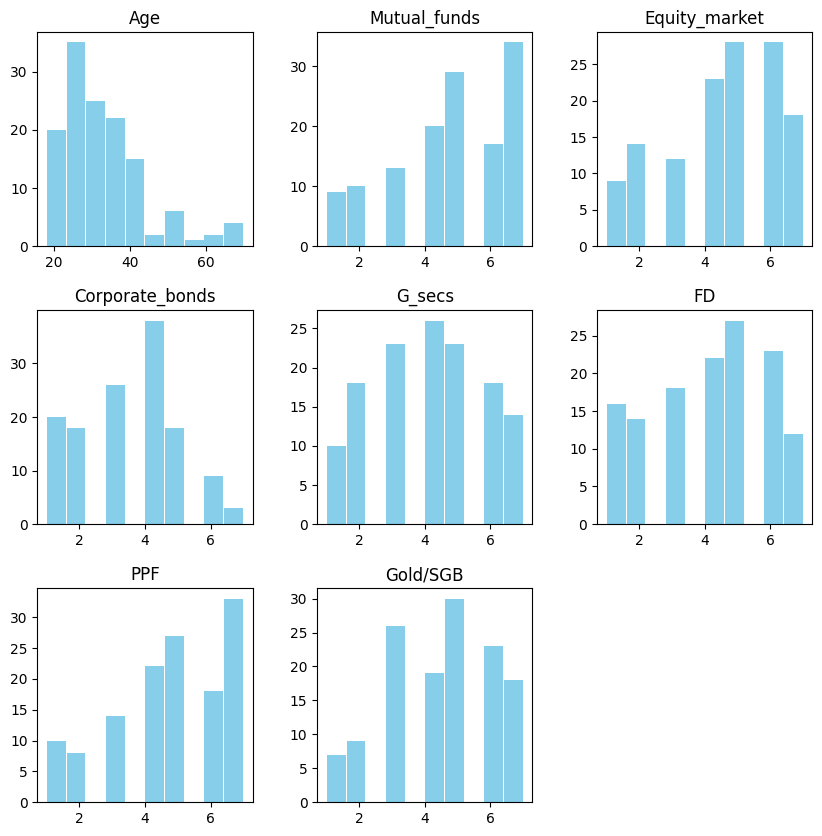

In [12]:
## Distribution visualization of Numeric columns
df.hist(figsize=(10,10),rwidth=0.95,color='skyblue', grid=False)
plt.title('Distributions')

**Observations:**

* Age histogram representation appears to be right-skewed.
* Other histogram have values ranging from 1 to 7 which exhibit no skewness.

Text(0.5, 1.0, 'Age Distribution')

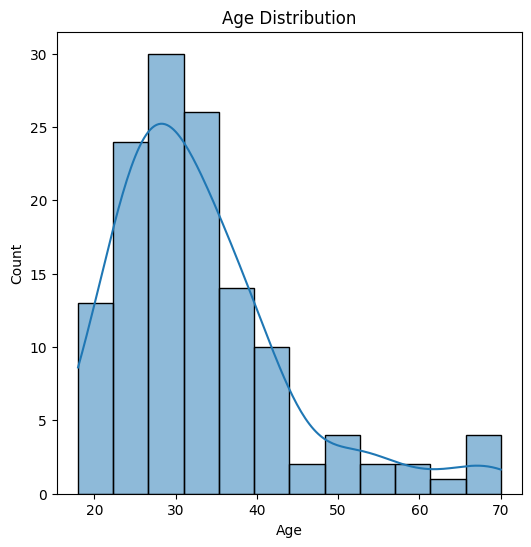

In [13]:
## Histogram of Age
plt.figure(figsize=(6,6))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')

**Observations:**

* Age distribution is right-skewed. Let's understand it this way, it means that most people in the group are younger and there are very few older people in the data set. Imagine seesaw where younger > older people.

Text(0.5, 1.0, 'Box-plot of numeric columns')

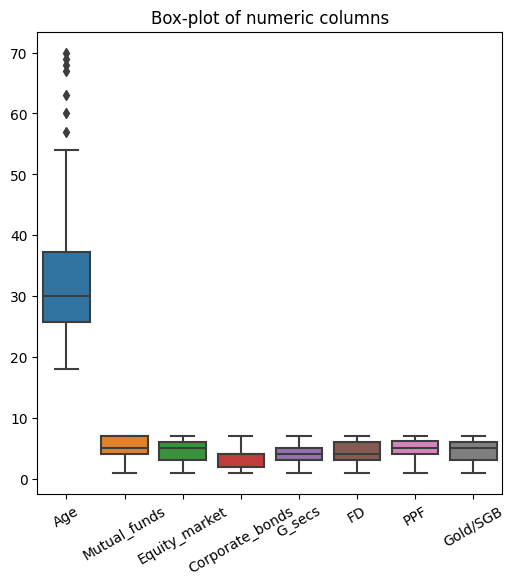

In [14]:
## Box-plot whisker of numeric columns
plt.figure(figsize=(6,6))
sns.boxplot(df)
plt.xticks(rotation=30)
plt.title('Box-plot of numeric columns')

**Observations:**

* Box plot shows that only the Age column has outliers, while the other numeric columns do not

Text(0.5, 1.0, 'Box-plot Whisker of Age')

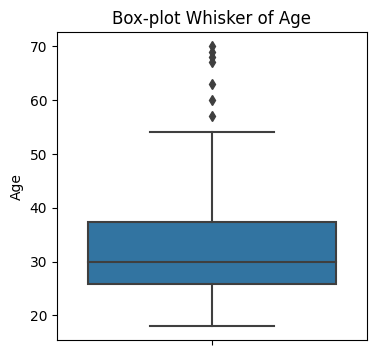

In [15]:
## Identifying the outliers in Age
plt.figure(figsize=(4,4))
sns.boxplot(df, y='Age')
plt.title('Box-plot Whisker of Age')

**Observations:**

* Due to the small size, I can easily identify 7 outliers, primarily in the Age column

In [16]:
## Creating an outliers function for calculating outliers in dataset
def outliers():
    Q1=df['Age'].quantile(0.25) ## 1st quartile is 25.75
    Q2=df['Age'].quantile(0.5) ## 2nd quartile is 30 i.e. meadian
    Q3=df['Age'].quantile(0.75) ## 3rd quartile is 37.25
    IQR=Q3-Q1 ## Inter quartile range is 11.5
    lower_bound=Q1-1.5*IQR ## Lower whisker is 8.5
    upper_bound=Q3+1.5*IQR ## Upper whisker is 54.5
    ## Anything above the upper_bound and below the lower_bound becomes the outliers
    return df[(df['Age']<lower_bound) | (df['Age']>upper_bound)]

## Calling outlier function
outliers()

,Gender,Age,Occupation,Education_level,Investment_avenues,Proportion_invest,Mutual_funds,Equity_market,Corporate_bonds,G_secs,...,Investment_monitor,Expected_return,Preferred_avenue,Savings_objective,Reason_equity,Reason_MF,Purpose_investment,Reason_Gsec,Reason_FD,Source
32,Male,63,Self-employed,Post Graduate,No,30% and above,3,4,4,6,...,Daily,5% - 10%,Bonds,Retirement Plan,Capital Appreciation,Tax Benefits,Savings for retirement,Safe Investment,Risk free,Internet
53,Male,68,Self-employed,Ph. D,Yes,30% and above,1,6,1,4,...,Weekly,10% - 20%,Equity,Retirement Plan,Power of compounding,Funds Diversification,Hedging against inflation,Safe Investment,Easy to invest in FD,Newspapers and Magazines
55,Male,69,Others,Professional Degree,Yes,30% and above,6,5,2,2,...,Monthly,10% - 20%,Mutual Funds,Retirement Plan,Power of compounding,Funds Diversification,Wealth creation,Tax Incentives,High Interest Rates,Financial Consultant
57,Male,60,Self-employed,Post Graduate,Yes,10% - 20%,2,2,4,3,...,Monthly,20% and above,Equity,Healthcare,Dividend Income,Tax Benefits,Savings for retirement,Safe Investment,Risk free,Financial Consultant
60,Male,67,Self-employed,Post Graduate,No,30% and above,1,7,2,2,...,Daily,20% and above,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Wealth creation,Risk-free returns,Risk free,Financial Consultant
106,Male,70,Self-employed,Professional Degree,Yes,5% - 10%,3,4,4,6,...,Weekly,10% - 20%,PPF - Public Provident Fund,Retirement Plan,Capital Appreciation,Funds Diversification,Savings for retirement,Safe Investment,Fixed returns,Newspapers and Magazines
111,Male,57,Salaried,Post Graduate,Yes,20% - 30%,7,6,4,5,...,Monthly,10% - 20%,Mutual Funds,Retirement Plan,Capital Appreciation,Better Returns,Savings for retirement,Risk-free returns,Fixed returns,Newspapers and Magazines


**Observations:**

* outliers() function identifed total of 7 outliers in the dataset, all of which are male individuals

(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

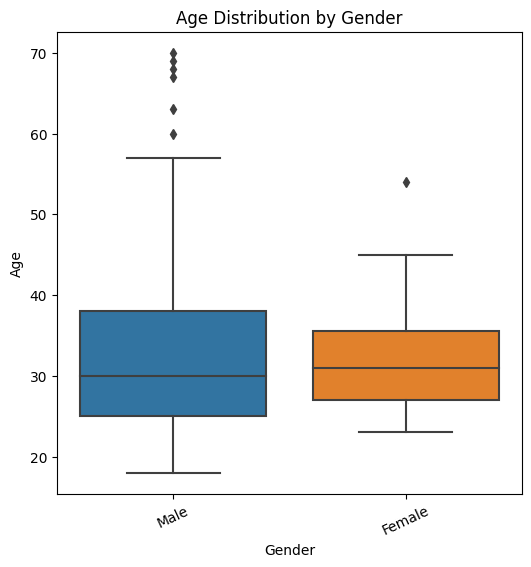

In [17]:
## Categorical vs. Numerical (Gender vs. Age)
plt.figure(figsize=(6,6))
sns.boxplot(df, x='Gender', y='Age')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.xticks(rotation=25)

**Observations:**

* After conducting categorical and numerical analysis comparing Gender and Age using box plots, it is discovered that there are 6 outliers in the male and 1 outlier in the female category. But in initial analysis, only male outliers were observed.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Salaried'),
  Text(1, 0, 'Others'),
  Text(2, 0, 'Self-employed'),
  Text(3, 0, 'Student')])

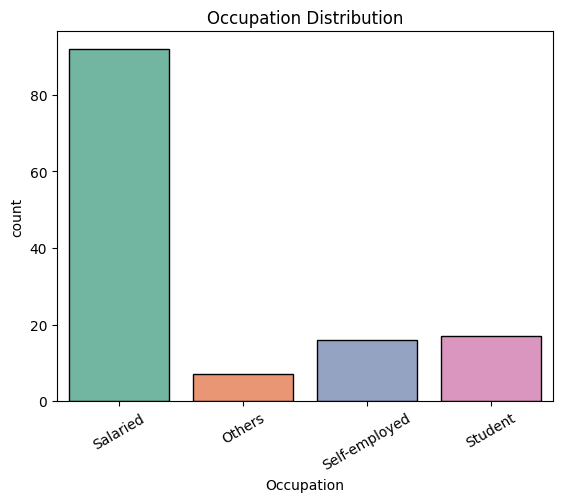

In [18]:
## Bar graph of Occupation
sns.countplot(df, x='Occupation', palette='Set2',edgecolor='black')
plt.title('Occupation Distribution')
plt.xticks(rotation=30)

**Observations:**

* Salaried investors dominate the dataset in terms of occupation

In [19]:
## Encoding categorical variables
df_encoded=pd.get_dummies(df, columns=['Gender'])

**Observations:**

* The Gender column has been one-hot encoded, this will result two new columns i.e. Gender_Male and Gender_Female

Text(0.5, 1.0, 'Gender Distribution')

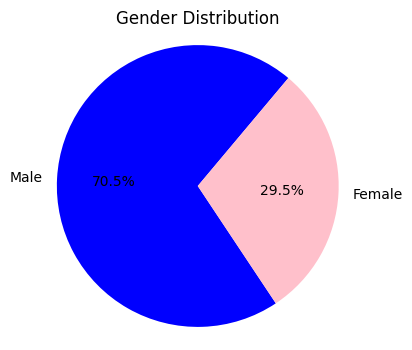

In [20]:
## Pie chart
male_count= df_encoded['Gender_Male'].sum()
female_count= df_encoded['Gender_Female'].sum()
labels= ['Male', 'Female']
sizes= [male_count, female_count]
colors= ['blue','pink']

plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, colors=colors, startangle=50, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Gender Distribution')

**Observations:**

* Pie chart clearly indicates that the majority of respondents in the dataset are males, significantly outnumbering females

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

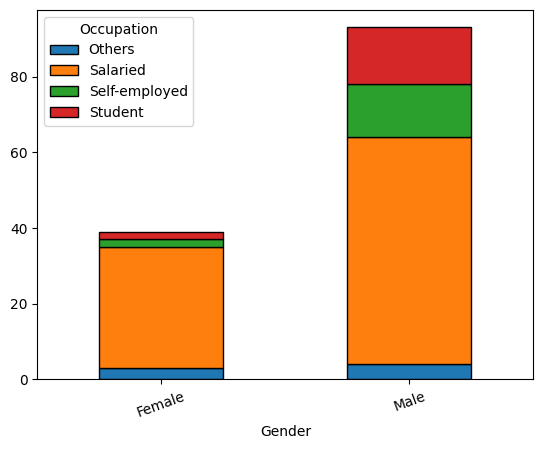

In [21]:
## Cross tabulation / Contigency table
table=pd.crosstab(index=df['Gender'], columns=df['Occupation'])
table.plot(kind='bar', stacked=True, edgecolor='black')
plt.xticks(rotation=20)

**Observations:**

* Stacked bar chart clearly illustrates that among investors, the salaried occupation is the most common for both males and females

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Hedging against inflation'),
  Text(1, 0, 'Returns'),
  Text(2, 0, 'Savings for retirement'),
  Text(3, 0, 'Wealth creation')])

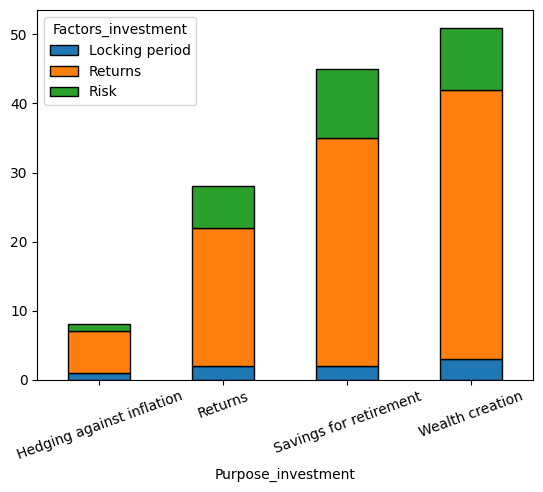

In [22]:
## Cross tabulation / Contigency table
table=pd.crosstab(index=df['Purpose_investment'], columns=df['Factors_investment'])
table.plot(kind='bar', stacked=True, edgecolor='black')
plt.xticks(rotation=20)

**Observations:**

* In the stacked bar chart that among investors, the most important purpose for investment is wealth creation and the important factor influencing this decision is the expected return on investment

In [23]:
## For loop to create a list of numeric columns
numeric_columns=[]
for column in df.columns:
    if df[column].dtype=='int64':
        numeric_columns.append(column)

corr_matrix= df[numeric_columns].corr()

**Observations:**

* Using for loop here eliminates the necessity of hardcoding column names and rather it easier to handle dataset modifications

Text(0.5, 1.0, 'Correlation Matrix')

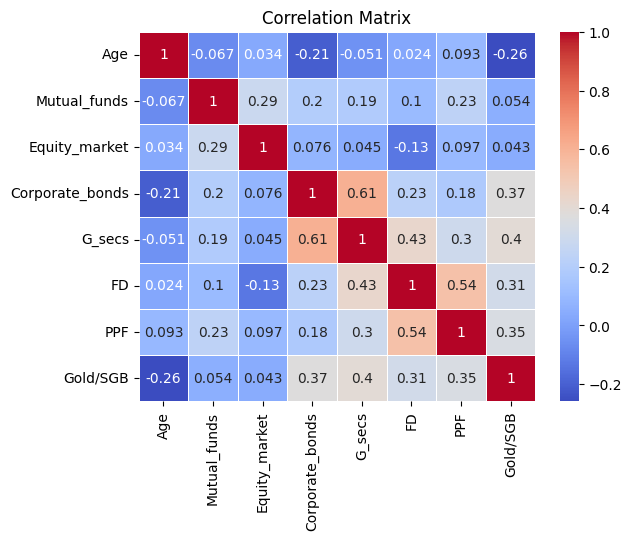

In [24]:
## Correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidth=0.6, linecolor='white')
plt.title('Correlation Matrix')

**Observations:**

* G-secs and Corporate bonds show a noticeable positive relationship with a correlation coefficient of 0.61 on the correlation matrix

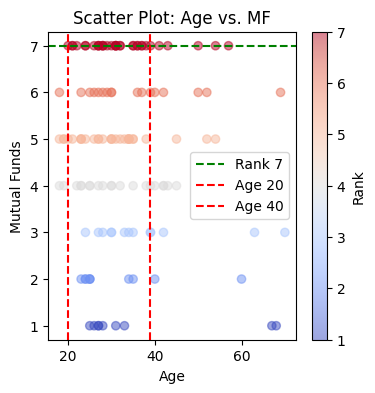

In [25]:
## Scatter plot of Age vs. Mutual Fund
plt.figure(figsize=(4,4))
colormap=plt.cm.coolwarm
plt.scatter(df['Age'], df['Mutual_funds'], c=df['Mutual_funds'], cmap=colormap, marker='o', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Mutual Funds')
plt.title('Scatter Plot: Age vs. MF')
plt.axhline(y=7, color='green', linestyle='--',label='Rank 7')
plt.axvline(x=20, color='red', linestyle='--', label='Age 20')
plt.axvline(x=39, color='red', linestyle='--', label='Age 40')
plt.colorbar(label='Rank')
plt.legend()

**Observations:**

* It appears that investors in the age group of 20 to 39 consistently assigned the highest ranking 7 to mutual funds, indicating strong preference for this investment avenue

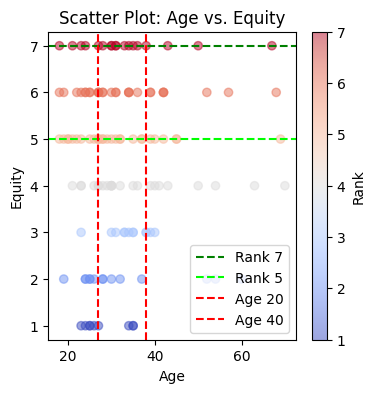

In [26]:
## Scatter plot of Age vs. Equity
plt.figure(figsize=(4,4))
colormap=plt.cm.coolwarm
plt.scatter(df['Age'], df['Equity_market'], c=df['Equity_market'], cmap=colormap, marker='o', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Equity')
plt.title('Scatter Plot: Age vs. Equity')
plt.axhline(y=7, color='green', linestyle='--',label='Rank 7')
plt.axhline(y=5, color='lime', linestyle='--',label='Rank 5')
plt.axvline(x=27, color='red', linestyle='--', label='Age 20')
plt.axvline(x=38, color='red', linestyle='--', label='Age 40')
plt.colorbar(label='Rank')
plt.legend()

**Observations:**

* It appears that investors in the age group of 27 to 38 consistently assigned the highest ranking 7 to equity, indicating strong preference for this investment avenue

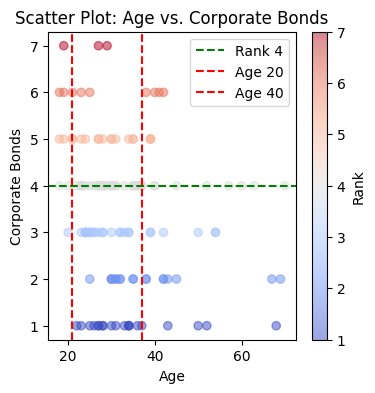

In [27]:
## Scatter plot of Age vs. Corporate Bonds
plt.figure(figsize=(4,4))
colormap=plt.cm.coolwarm
plt.scatter(df['Age'], df['Corporate_bonds'], c=df['Corporate_bonds'], cmap=colormap, marker='o', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Corporate Bonds')
plt.title('Scatter Plot: Age vs. Corporate Bonds')
plt.axhline(y=4, color='green', linestyle='--',label='Rank 4')
plt.axvline(x=21, color='red', linestyle='--', label='Age 20')
plt.axvline(x=37, color='red', linestyle='--', label='Age 40')
plt.colorbar(label='Rank')
plt.legend()

**Observations:**

* Investors falling within the age range of 21 to 37 predominantly assign a ranking of 4 to corporate bonds, suggesting that this group considers corporate bonds as moderately important in their investment choices

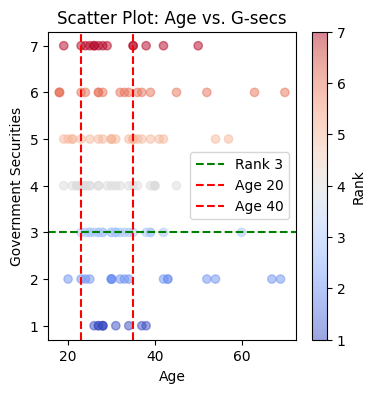

In [28]:
## Scatter plot of Age vs. Government Securities
plt.figure(figsize=(4,4))
colormap=plt.cm.coolwarm
plt.scatter(df['Age'], df['G_secs'], c=df['G_secs'], cmap=colormap, marker='o', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Government Securities')
plt.title('Scatter Plot: Age vs. G-secs')
plt.axhline(y=3, color='green', linestyle='--',label='Rank 3')
plt.axvline(x=23, color='red', linestyle='--', label='Age 20')
plt.axvline(x=35, color='red', linestyle='--', label='Age 40')
plt.colorbar(label='Rank')
plt.legend()

**Observations:**

* Investors aged 23 to 35 generally consider government securities with a ranking of 3, signifying moderate importance

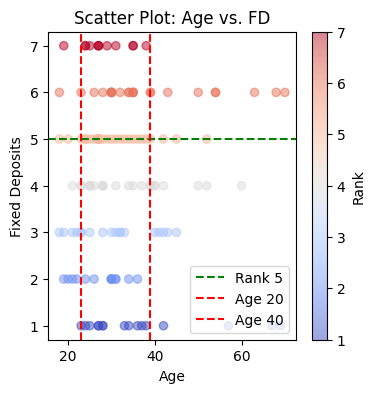

In [29]:
## Scatter plot of Age vs. Fixed Deposits
plt.figure(figsize=(4,4))
colormap=plt.cm.coolwarm
plt.scatter(df['Age'], df['FD'], c=df['FD'], cmap=colormap, marker='o', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fixed Deposits')
plt.title('Scatter Plot: Age vs. FD')
plt.axhline(y=5, color='green', linestyle='--',label='Rank 5')
plt.axvline(x=23, color='red', linestyle='--', label='Age 20')
plt.axvline(x=39, color='red', linestyle='--', label='Age 40')
plt.colorbar(label='Rank')
plt.legend()

**Observations:**

* Investors aged 23 to 39 commonly prioritize fixed deposits, assigning them a ranking of 5, indicating a moderate level of importance

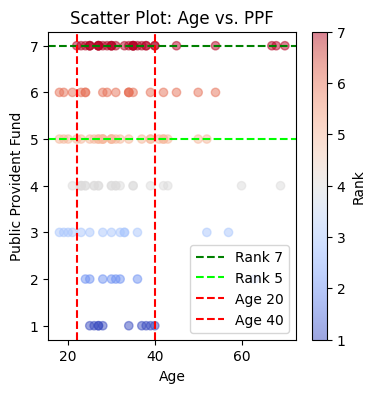

In [30]:
## Scatter plot of Age vs. Public Provident Fund
plt.figure(figsize=(4,4))
colormap=plt.cm.coolwarm
plt.scatter(df['Age'], df['PPF'], c=df['PPF'], cmap=colormap, marker='o', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Public Provident Fund')
plt.title('Scatter Plot: Age vs. PPF')
plt.axhline(y=7, color='green', linestyle='--',label='Rank 7')
plt.axhline(y=5, color='lime', linestyle='--',label='Rank 5')
plt.axvline(x=22, color='red', linestyle='--', label='Age 20')
plt.axvline(x=40, color='red', linestyle='--', label='Age 40')
plt.colorbar(label='Rank')
plt.legend()

**Observations:**

* Investors between the ages of 22 to 40, the majority of investors ranked PPF as highly important 7 in their investment decisions

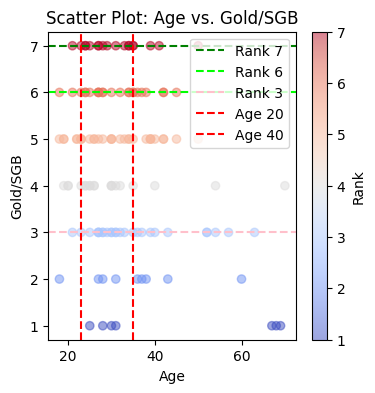

In [31]:
## Scatter plot of Age vs. Gold/Sovereign Gold Bond
plt.figure(figsize=(4,4))
colormap=plt.cm.coolwarm
plt.scatter(df['Age'], df['Gold/SGB'], c=df['Gold/SGB'], cmap=colormap, marker='o', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Gold/SGB')
plt.title('Scatter Plot: Age vs. Gold/SGB')
plt.axhline(y=7, color='green', linestyle='--',label='Rank 7')
plt.axhline(y=6, color='lime', linestyle='--',label='Rank 6')
plt.axhline(y=3, color='pink', linestyle='--',label='Rank 3')
plt.axvline(x=23, color='red', linestyle='--', label='Age 20')
plt.axvline(x=35, color='red', linestyle='--', label='Age 40')
plt.colorbar(label='Rank')
plt.legend()

**Observations:**

* Gold/SGB received the ranking 7 from investors in the age group of 23 to 35

**Summary of Age vs. various investment avenues:**

After analyzing age-based investment preferences using scatter plot, I found that investors aged 20 to 39 preferred mutual funds, those aged 27 to 38 leaned towards equity, and individuals aged 21 to 37 showed moderate interest in corporate bonds. G-secs were moderately important for ages 23 to 35, FDs for ages 23 to 39, and PPF for ages 22 to 40. Gold/SGB received a high ranking from ages 23 to 35.

> **To clarify these insights, I am going to conduct an ANOVA test to assess if age significantly influences investment choices and to analyze the differences among investment categories mean.**

In [32]:
## ANOVA analysis on Age and Preferred investment avenue
model= ols('Age ~ Preferred_avenue', df).fit()
anova_table=sm.stats.anova_lm(model, typ=2)
print(anova_table)

                        sum_sq     df         F    PR(>F)
Preferred_avenue    968.407078    5.0  1.663909  0.148089
Residual          14666.585346  126.0       NaN       NaN


**Observations:**

**H0: μ(Bonds) = μ(Gold/SGBs) = μ(Equity) = μ(Fixed Deposits) = μ(Mutual Funds) = μ(PPF - Public Provident Fund)**

H0: There is no significant difference in the average ages of investors across all the preferred investment avenues.

**Ha: μ(Bonds) ≠ μ(Gold/SGBs) ≠ μ(Equity) ≠ μ(Fixed Deposits) ≠ μ(Mutual Funds) ≠ μ(PPF - Public Provident Fund)**

Ha: There is a significant difference in the average ages of investors across all the preferred investment avenues.

α = 0.05

* The p-value or probability value obtained from the analysis is 0.148089, which is greater than the chosen significance level of 0.05. Therefore, fail to reject the null hypothesis.

# Summary of Investment avenues influenced by age

In nutshell, this means that I didn't find enough evidence to conclude that there is a significant difference in the average ages of investors who prefer different types of investments. It is possible that the investors age doesn't strongly influence their choice of investment avenue based on this analysis.

> These insights are for study purposes only and should not be considered as financial advice.